<a href="https://colab.research.google.com/github/truongthuanr/self-learning-project/blob/main/04_NLP_Disater_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Information

**Problem:** Predict which Tweets are about real disasters and which ones are not

dataset: 
  * https://www.kaggle.com/c/nlp-getting-started/data


# Import data

In [1]:
train_url = "https://raw.githubusercontent.com/truongthuanr/self-learning-project/main/dataset/DisaterTweet/train.csv"

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(train_url)

# Explotary Data

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_colwidth',1000)

In [5]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [6]:
df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

length of  data

In [7]:
df.shape

(7613, 5)

**Description:**

`id` - a unique identifier for each tweet

`text` - the text of the tweet

`location` - the location the tweet was sent from (may be blank)

`keyword` - a particular keyword from the tweet (may be blank)

`target` - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

In [8]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


take a look on target column

In [9]:
df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

check for random data

In [10]:
import random
for i in range(0,5):
  random_index = random.randint(0,len(df))
  text_,target_ = df[["text","target"]].iloc[random_index]
  print(f"target: {target_}", "(real disater)" if target_!=0 else "(not didater)")
  print(f"Text:\n{text_}\n")

target: 1 (real disater)
Text:
Accident left lane blocked in #Manchester on Rt 293 NB before Eddy Rd stop and go traffic back to NH-3A delay of 4 mins #traffic

target: 1 (real disater)
Text:
SB57 [NEW] Deepwater Horizon Oil Spill distribution of funds from BP settlement road and bridge projects in Bal... http://t.co/dKpsrkG6pc

target: 1 (real disater)
Text:
Don't miss Chris #Appy's detonation of the myths obscuring our crime in #Hiroshima 70 yrs ago this month. @salon http://t.co/DlP8kPkt2k

target: 1 (real disater)
Text:
Some Evansville residents told to limit water usage due to sinkhole construction: Some Evansville residents haveÛ_ http://t.co/SJNyFszCu1

target: 1 (real disater)
Text:
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives: A group of villagers saved over 70 passengers' lives after two train...



In [11]:
print("longest text length: ")
print(df["text"].apply(len).max())
print(df[df["text"].apply(len) == df["text"].apply(len).max()]['text'])

print("Shortest text length: ")
print(df["text"].apply(len).min())
print(df[df["text"].apply(len) == df["text"].apply(len).min()]['text'])

longest text length: 
157
1270    when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????
Name: text, dtype: object
Shortest text length: 
7
1882    Crushed
4890    Bad day
5115    Err:509
Name: text, dtype: object


# Split data to training set and testing set

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, y_train, X_test, y_test = train_test_split(df["text"],
                                                    df["target"],
                                                    test_size=0.15,
                                                    random_state=40)

In [14]:
X_train[:10]

4599                                                            Jack Wilshere has poor injury recordand his off field behaviors doesn't help.#Arsenal
6861    Why #Marijuana Is Critical For Research in Treating #PTSD\n\nhttp://t.co/T6fuAhFp7p \n#hempoil #cannabis #marijuanaÛ_ http://t.co/RhE7dXM7Ey
5404                                                                   New post: 'People are finally panicking about cable TV' http://t.co/df9FjonVeP
2684                                            Ignition Knock (Detonation) Sensor-Senso Standard KS161 http://t.co/WadPP69LwJ http://t.co/yjTh2nABv5
283                                                                                                                         the apocalypse is upon us
2374                      Dr. Gridlock: HereÛªs what may have caused a Metro train to derail in downtown D.C. http://t.co/Pm2TNnFDWw #washingtonpost
1588              One day I want someone to run for the ferry fall and crack there face open for alm

# Text tokenization

In [15]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [17]:
# Text vectorization by default
text_vectorization = TextVectorization(max_tokens=None,   # how many word in the vocab lib
                                       standardize='lower_and_strip_punctuation', # process the tab
                                       split='whitespace', # split the token
                                       ngrams=None, 
                                       output_mode='int', # map token to number
                                       output_sequence_length=None,
                                       pad_to_max_tokens=False, 
                                       vocabulary=None,)

`max_tokens` (the number of words in the vocabulary) common values: multiples of 10,000 (10,000, 20,000, 30,000)

In [20]:
# Find average number of tikens (words) in the training Tweets
# (total words)/(number of sentences)
round(sum([len(sentence.split()) for sentence in X_train])/len(X_train))

15

In [34]:
# max length of sentence (by word), on the training set
sentences_length = [len(text.split()) for text in X_train]
max(sentences_length)

31

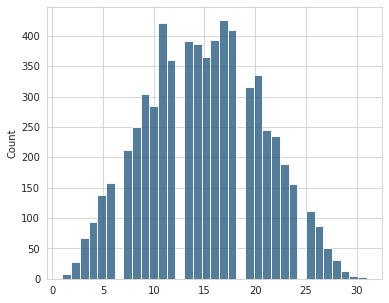

In [50]:
fig = plt.figure(figsize=(6,5))
sns.set_style('whitegrid')
sns.histplot(sentences_length, color="#1A5276")

Custom parameters for text vectorization

In [71]:
# setup text vectorization parameters
max_vocab_length = 20000
max_length = 25

In [72]:
text_vectorization = TextVectorization(max_tokens=max_vocab_length,
                                       output_mode="int",
                                       output_sequence_length=max_length)

map the text_vectorization to the training data set

In [73]:
text_vectorization.adapt(X_train)

Check some token

In [74]:
word_in_vocab = text_vectorization.get_vocabulary()

20000

# Text Embedding Layer